In [151]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/prathyushmaniyam/Desktop/projects/raw datasets copy/ncr_ride_bookings.csv")
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [7]:
df.shape

(150000, 21)

In [9]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [17]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [23]:
median_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_23488/706082539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [25]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,NaN,NaN,NaN,NaN,NaN,NaN,414.0,23.72,4.3,4.5,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,4.3,4.5,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [27]:
binary_cols = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 1 else 0)

In [29]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,0,NaN,0,NaN,0,NaN,414.0,23.72,4.3,4.5,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,NaN,0,NaN,1,Vehicle Breakdown,237.0,5.73,4.3,4.5,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,NaN,0,NaN,0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,NaN,0,NaN,0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,NaN,0,NaN,0,NaN,737.0,48.21,4.1,4.3,UPI


In [31]:
reason_cols = ['Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason']
for col in reason_cols:
    df[col].fillna('No Reason', inplace=True)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_23488/2369408821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('No Reason', inplace=True)
/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_23488/2369408821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [33]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,0,4,0,2,0,1,414.0,23.72,4.3,4.5,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,4,0,2,1,3,237.0,5.73,4.3,4.5,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,4,0,2,0,1,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,4,0,2,0,1,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,4,0,2,0,1,737.0,48.21,4.1,4.3,UPI


In [35]:
categorical_cols = ['Booking Status', 'Vehicle Type', 'Payment Method']
df = pd.get_dummies(df, columns=categorical_cols, prefix=['Booking', 'Vehicle', 'Payment'])

In [37]:
df.head()

,Date,Time,Booking ID,Customer ID,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Booking_Cancelled by Customer,Booking_Cancelled by Driver,Booking_Completed,Booking_Incomplete,Booking_No Driver Found,Vehicle_Auto,Vehicle_Bike,Vehicle_Go Mini,Vehicle_Go Sedan,Vehicle_Premier Sedan,Vehicle_Uber XL,Vehicle_eBike,Payment_Cash,Payment_Credit Card,Payment_Debit Card,Payment_UPI,Payment_Uber Wallet
0,2024-03-23,12:29:38,"""CNR5884300""","""CID1982111""",Palam Vihar,Jhilmil,8.3,28.8,0,4,0,2,0,1,414.0,23.72,4.3,4.5,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,2024-11-29,18:01:39,"""CNR1326809""","""CID4604802""",Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,4,0,2,1,3,237.0,5.73,4.3,4.5,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
2,2024-08-23,08:56:10,"""CNR8494506""","""CID9202816""",Khandsa,Malviya Nagar,13.4,25.8,0,4,0,2,0,1,627.0,13.58,4.9,4.9,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,2024-10-21,17:17:25,"""CNR8906825""","""CID2610914""",Central Secretariat,Inderlok,13.1,28.5,0,4,0,2,0,1,416.0,34.02,4.6,5.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,2024-09-16,22:08:00,"""CNR1950162""","""CID9933542""",Ghitorni Village,Khan Market,5.3,19.6,0,4,0,2,0,1,737.0,48.21,4.1,4.3,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [41]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

df.drop(['Date', 'Time'], axis=1, inplace=True)

In [43]:
for col in ['Pickup Location', 'Drop Location']:
    freq = df[col].value_counts()
    df[col] = df[col].map(freq)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['Driver Ratings'], bins=10, kde=True, ax=axes[0], color='darkblue')
axes[0].set_title("Driver Ratings Distribution")
sns.histplot(df['Customer Rating'], bins=10, kde=True, ax=axes[1], color='darkgreen')
axes[1].set_title("Customer Ratings Distribution")
plt.tight_layout()
plt.show()

In [59]:
X_cls = df.drop(['Booking_Completed','Booking ID', 'Customer ID'], axis=1)  # Change target column based on One-Hot
y_cls = df['Booking_Completed']

In [61]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [77]:
X_reg = df.drop(['Booking Value','Booking ID', 'Customer ID'], axis=1)
y_reg = df['Booking Value']

In [79]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

### Classification

In [67]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
print(classification_report(y_test_cls, y_pred_cls))

=== Classification Report ===
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11358
        True       1.00      1.00      1.00     18642

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



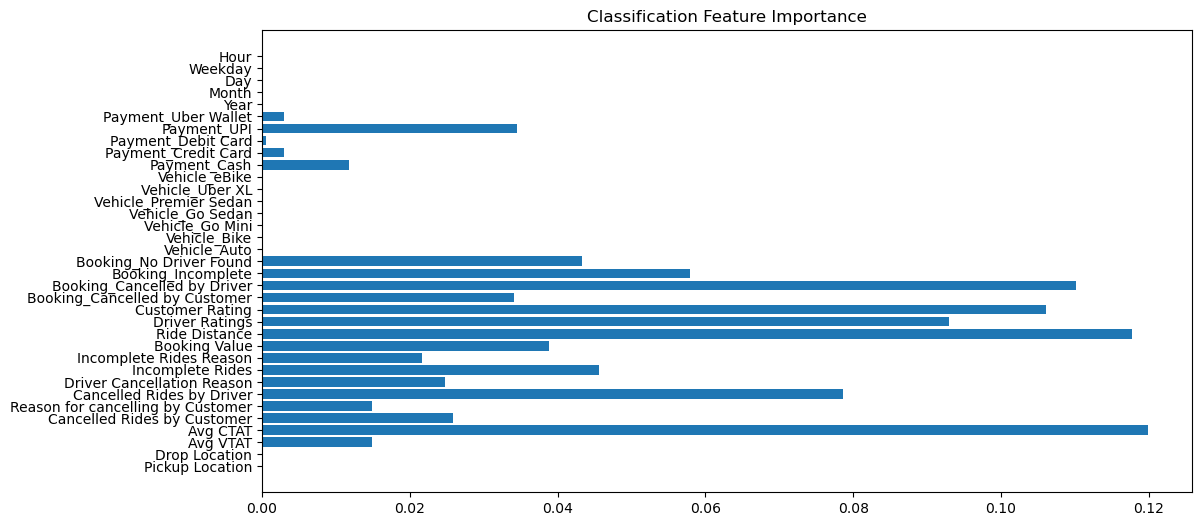

In [69]:
importances_cls = clf.feature_importances_
plt.figure(figsize=(12,6))
plt.barh(X_cls.columns, importances_cls)
plt.title("Classification Feature Importance")
plt.show()

In [83]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

### Regression

In [111]:
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 321.9405755816747
R2: 0.042939953691129795


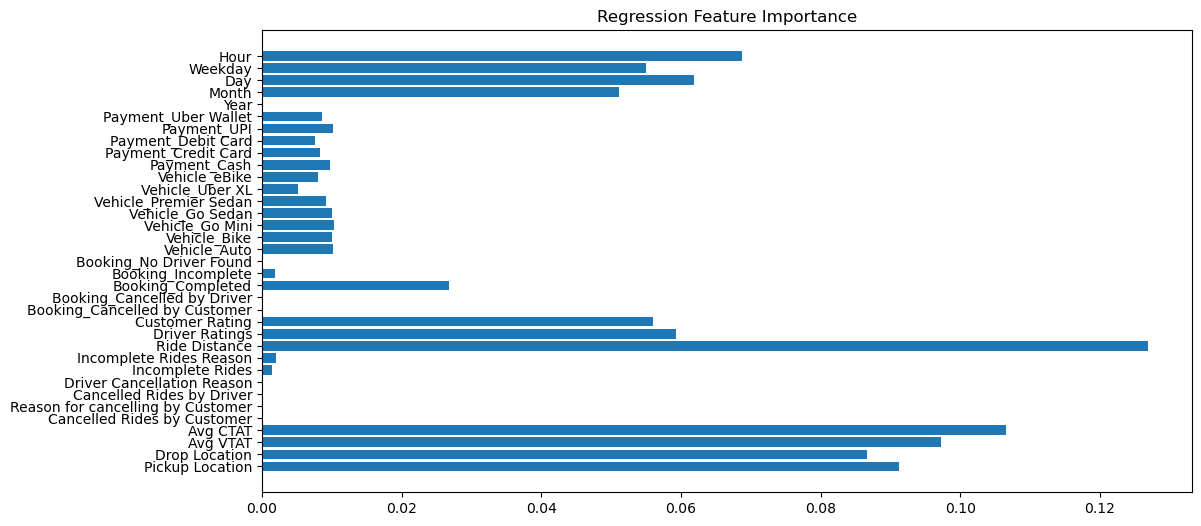

In [93]:
importances_reg = reg.feature_importances_
plt.figure(figsize=(12,6))
plt.barh(X_reg.columns, importances_reg)
plt.title("Regression Feature Importance")
plt.show()

In [95]:
feat_cls_norm = pd.Series(importances_cls, index=X_cls.columns) / max(importances_cls)
feat_reg_norm = pd.Series(importances_reg, index=X_reg.columns) / max(importances_reg)

In [99]:
threshold = 0.05

cls_important = feat_cls_norm[feat_cls_norm > threshold]
reg_important = feat_reg_norm[feat_reg_norm > threshold]

# Shared important features
shared_features = cls_important.index.intersection(reg_important.index)

# Unique to classification
unique_cls = cls_important.index.difference(shared_features)

# Unique to regression
unique_reg = reg_important.index.difference(shared_features)

print("Shared Important Features:\n", shared_features.tolist())
print("\nUnique Classification Features:\n", unique_cls.tolist())
print("\nUnique Regression Features:\n", unique_reg.tolist())

Shared Important Features:
 ['Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment_Cash', 'Payment_UPI']

Unique Classification Features:
 ['Booking Value', 'Booking_Cancelled by Customer', 'Booking_Cancelled by Driver', 'Booking_Incomplete', 'Booking_No Driver Found', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Reason for cancelling by Customer']

Unique Regression Features:
 ['Booking_Completed', 'Day', 'Drop Location', 'Hour', 'Month', 'Payment_Credit Card', 'Payment_Debit Card', 'Payment_Uber Wallet', 'Pickup Location', 'Vehicle_Auto', 'Vehicle_Bike', 'Vehicle_Go Mini', 'Vehicle_Go Sedan', 'Vehicle_Premier Sedan', 'Vehicle_eBike', 'Weekday']


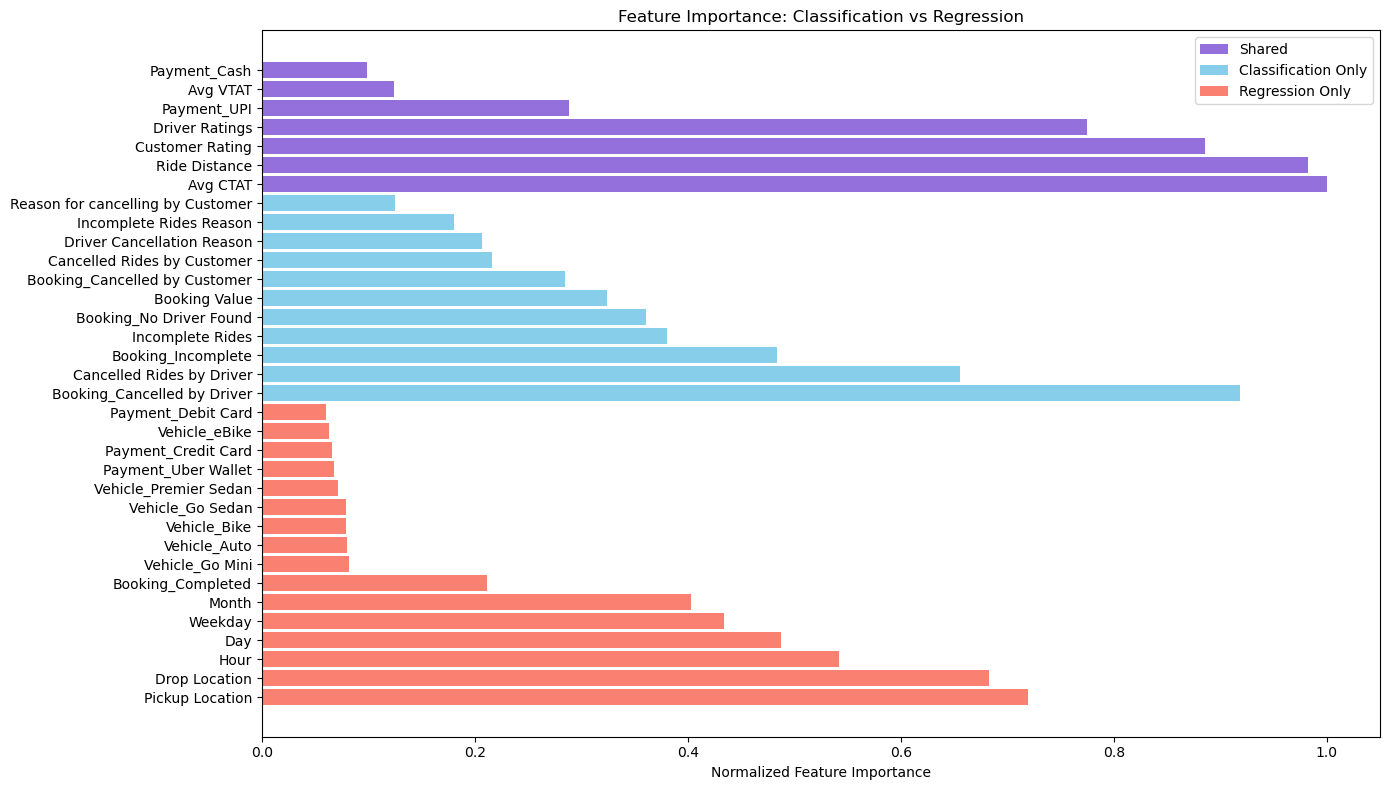

In [105]:
plt.figure(figsize=(14,8))

shared_features_sorted = shared_features[np.argsort(feat_cls_norm[shared_features])]
unique_cls_sorted = unique_cls[np.argsort(feat_cls_norm[unique_cls])]
unique_reg_sorted = unique_reg[np.argsort(feat_reg_norm[unique_reg])]


plt.barh(shared_features_sorted, feat_cls_norm[shared_features_sorted], color='mediumpurple', label='Shared')
plt.barh(unique_cls_sorted, feat_cls_norm[unique_cls_sorted], color='skyblue', label='Classification Only')
plt.barh(unique_reg_sorted, feat_reg_norm[unique_reg_sorted], color='salmon', label='Regression Only')

plt.xlabel("Normalized Feature Importance")
plt.title("Feature Importance: Classification vs Regression")
plt.legend()
plt.gca().invert_yaxis()  # highest importance on top
plt.tight_layout()
plt.show()

In [117]:
X_cls_final = df[ list(shared_features) + list(unique_cls) ]
y_cls = df['Booking_Completed'] 

In [119]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls_final, y_cls, test_size=0.2, random_state=42)

In [135]:
models_cls = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

results_cls = {}

for name, model in models_cls.items():
    model.fit(Xc_train, yc_train)
    y_pred = model.predict(Xc_test)
    results_cls[name] = {
        "Accuracy": accuracy_score(yc_test, y_pred),
        "F1 Score": f1_score(yc_test, y_pred, average='weighted'),
        "ROC AUC": roc_auc_score(pd.get_dummies(yc_test), pd.get_dummies(y_pred), average='weighted', multi_class='ovr')
    }

results_cls = pd.DataFrame(results_cls).T
print(results_cls)

                     Accuracy  F1 Score   ROC AUC
Logistic Regression  1.000000  1.000000  1.000000
Random Forest        1.000000  1.000000  1.000000
Gradient Boosting    0.999967  0.999967  0.999973
XGBoost              1.000000  1.000000  1.000000


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:10] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [141]:
X_reg_final = df[ list(shared_features) + list(unique_reg) ]
y_reg = df['Booking Value']

In [143]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_final, y_reg, test_size=0.2, random_state=42)

In [157]:
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results_reg = {}

for name, model in models_reg.items():
    model.fit(Xr_train, yr_train)
    y_pred = model.predict(Xr_test)
    results_reg[name] = {

        "RMSE" :  np.sqrt(mean_squared_error(yr_test, y_pred)),
        "R2 Score": r2_score(yr_test, y_pred)

    }

results_reg = pd.DataFrame(results_reg).T
print(results_reg)

                         RMSE  R2 Score
Linear Regression  322.122596  0.041857
Random Forest      321.950559  0.042881
Gradient Boosting  316.683590  0.073941
XGBoost            322.229774  0.041220


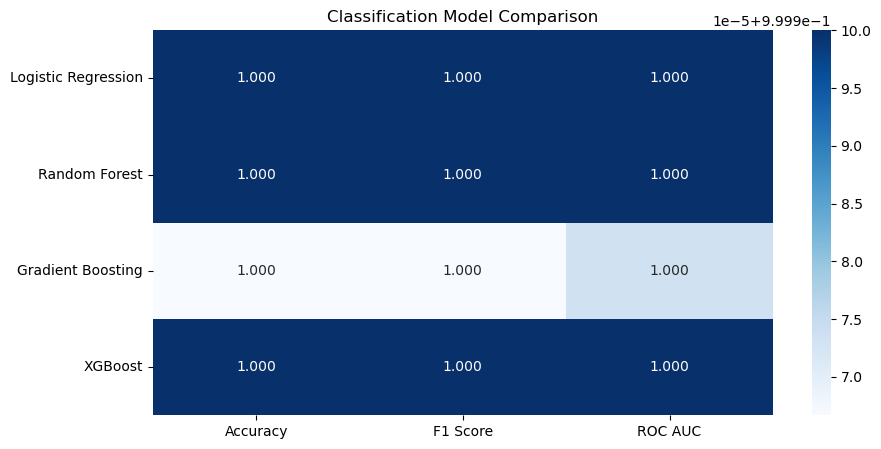

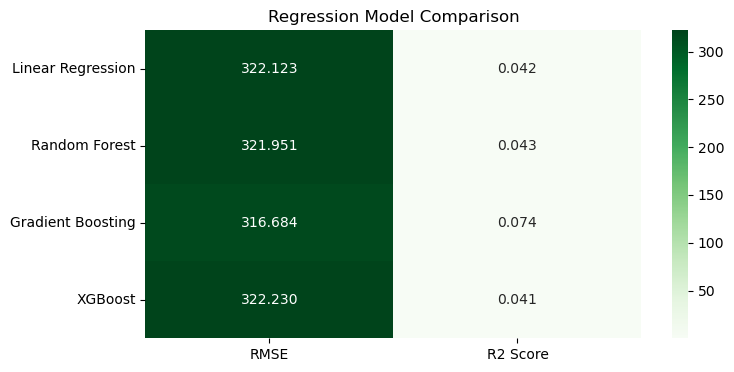

In [159]:

plt.figure(figsize=(10,5))
sns.heatmap(results_cls, annot=True, cmap="Blues", fmt=".3f")
plt.title("Classification Model Comparison")
plt.show()

plt.figure(figsize=(8,4))
sns.heatmap(results_reg, annot=True, cmap="Greens", fmt=".3f")
plt.title("Regression Model Comparison")
plt.show()